Análisis de Sentimientos en Reseñas de Películas (IMDB Movie Reviews Dataset)

## Grupo 6:

- Miguel Ángel Pablos  

- María Alejandra Olarte

- Carlos Mauricio Arteaga

## 4. Modelado

In [ ]:
import pandas as pd

In [ ]:
df_cleaned = pd.read_csv('df_cleaned.csv')
df_cleaned

,review,sentiment,review_length
0,one reviewers mention watch oz episode youll h...,1,1139
1,wonderful little production film technique una...,1,628
2,think wonderful way spend time hot summer week...,1,560
3,basically theres family where little boy jake ...,0,449
4,petter matteis love time money visually stun f...,1,859
...,...,...,...
49995,think movie right good job wasnt creative orig...,1,540
49996,bad plot bad dialogue bad act idiotic direct a...,0,387
49997,catholic teach parochial elementary school nun...,0,801
49998,im go disagree previous comment side maltin on...,0,807


In [ ]:
### Conversion a vectores utilizando TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un objeto TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 3), analyzer='word')

# Ajustar y transformar los datos de entrenamiento
X = vectorizer.fit_transform(df_cleaned['review'])

In [ ]:
X.shape

(50000, 3000)

In [ ]:
y = df_cleaned['sentiment']

In [ ]:
# Convertir a formato denso
X_dense = X.toarray()

In [ ]:
# Redimensionar los datos
X_dense = X_dense.reshape(X_dense.shape[0], X_dense.shape[1], 1)  # Añadir dimensión para características

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2, random_state=42)

In [ ]:
# Construcción del modelo CNN
model_cnn = Sequential([
    Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(X_dense.shape[1], 1)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Clasificación binaria
])

# Compilar el modelo
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 2996, 128)           │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,089 (35.50 KB)

 Trainable params: 9,089 (35.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo
history = model_cnn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,  # Ajustar según el dataset
    batch_size=32,
    verbose=1
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 242s 192ms/step - accuracy: 0.5094 - loss: 0.6931 - val_accuracy: 0.5334 - val_loss: 0.6913
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 243s 194ms/step - accuracy: 0.5181 - loss: 0.6919 - val_accuracy: 0.5315 - val_loss: 0.6910
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 263s 195ms/step - accuracy: 0.5263 - loss: 0.6915 - val_accuracy: 0.5243 - val_loss: 0.6914
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 264s 197ms/step - accuracy: 0.5270 - loss: 0.6910 - val_accuracy: 0.5255 - val_loss: 0.6911
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 261s 196ms/step - accuracy: 0.5285 - loss: 0.6908 - val_accuracy: 0.5154 - val_loss: 0.6926
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 262s 196ms/step - accuracy: 0.5207 - loss: 0.6913 - val_accuracy: 0.5320 - val_loss: 0.6907
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 259s 194ms/step - accuracy: 0.5228 - loss: 0.6913 - val_accuracy: 0.5247 - val_loss: 0.6909
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 265s 196ms/step - ac

In [ ]:
# Evaluar el modelo
loss, accuracy = model_cnn.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Loss: 0.6909574866294861, Accuracy: 0.5282999873161316


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generar predicciones
y_pred_probs = model_cnn.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=["Negative", "Positive"])
print("\nClassification Report:\n", report)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step
Accuracy: 0.5283

Classification Report:
               precision    recall  f1-score   support

    Negative       0.54      0.34      0.42      4961
    Positive       0.52      0.71      0.60      5039

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.51     10000
weighted avg       0.53      0.53      0.51     10000


Confusion Matrix:
 [[1708 3253]
 [1464 3575]]


313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step


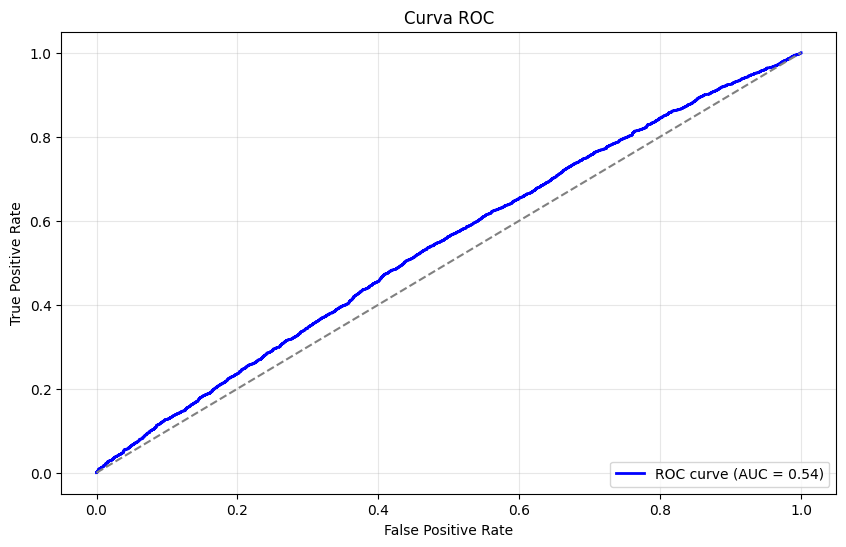

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generar las probabilidades predichas
y_pred_probs = model_cnn.predict(X_test).ravel()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea base
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()